# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

/Users/ritabanchowdhury/.local/lib/python3.7/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


## LiH

In [10]:
bond_lengths = np.linspace(0.2,6.6,15)

In [4]:
print(bond_lengths)

[0.2        0.65714286 1.11428571 1.57142857 2.02857143 2.48571429
 2.94285714 3.4        3.85714286 4.31428571 4.77142857 5.22857143
 5.68571429 6.14285714 6.6       ]


In [5]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -4.041729928511219 Eh
E = -7.433624280508259 Eh
E = -7.830137749383775 Eh
E = -7.882668561853654 Eh
E = -7.85894217709869 Eh
E = -7.824677259449836 Eh
E = -7.800843983108832 Eh
E = -7.789498785374221 Eh
E = -7.784993262422025 Eh
E = -7.783312159663706 Eh
Could not converge
Could not converge
Could not converge
Could not converge
Could not converge


In [6]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -3.999938081851428 Eh
E = -7.4143197335717 Eh
E = -7.813439002229504 Eh
E = -7.862747590802046 Eh
E = -7.827898943734708 Eh
E = -7.772771272681478 Eh
E = -7.717414397932959 Eh
E = -7.670202787853019 Eh
E = -7.6341633369792214 Eh
E = -7.6085355325100235 Eh
Could not converge
Could not converge
Could not converge
Could not converge
Could not converge


In [7]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -4.041626337620865 Eh
E = -7.433610841372493 Eh
E = -7.830130845972732 Eh
E = -7.882656692757961 Eh
E = -7.858923025123396 Eh
E = -7.824640122043734 Eh
E = -7.800769940480854 Eh
E = -7.789389227862772 Eh
E = -7.784860941685535 Eh
E = -7.783167797469086 Eh
Could not converge
Could not converge
Could not converge
Could not converge
Could not converge


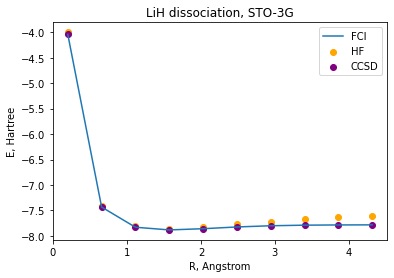

In [8]:
#Plot LiH PESs

plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

In [11]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -4.041729928511219 Eh
E = -7.433624280508259 Eh
E = -7.830137749383775 Eh
E = -7.882668561853654 Eh
E = -7.85894217709869 Eh
E = -7.824677259449836 Eh
E = -7.800843983108832 Eh
E = -7.789498785374221 Eh
E = -7.784993262422025 Eh
E = -7.783312159663706 Eh
Could not converge
Could not converge
Could not converge
Could not converge
Could not converge


In [12]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -3.999938081851428 Eh
E = -7.4143197335717 Eh
E = -7.813439002229504 Eh
E = -7.862747590802046 Eh
E = -7.827898943734708 Eh
E = -7.772771272681478 Eh
E = -7.717414397932959 Eh
E = -7.670202787853019 Eh
E = -7.6341633369792214 Eh
E = -7.6085355325100235 Eh
Could not converge
Could not converge
Could not converge
Could not converge
Could not converge


In [13]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -4.041626337620865 Eh
E = -7.433610841372493 Eh
E = -7.830130845972732 Eh
E = -7.882656692757961 Eh
E = -7.858923025123396 Eh
E = -7.824640122043734 Eh
E = -7.800769940480854 Eh
E = -7.789389227862772 Eh
E = -7.784860941685535 Eh
E = -7.783167797469086 Eh
Could not converge
Could not converge
Could not converge
Could not converge
Could not converge


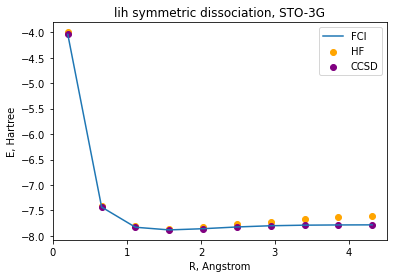

In [14]:
#Plot LiH PESs

plt.title('lih symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()